# Why to perform get_dummies or one_hot_encoder?
Machines understand numbers, not text. We need to convert each text category to numbers in order for the machine to process them using mathematical equations. 
## Categorical Encoding:
Structured dataset includes multiple columns – a combination of numerical as well as categorical variables. These categorigal variales are of two types namely Nominal & Ordinal. (Refer Screenshot)<br>
Nominal - Unordered - Categorie of shapes, places, color         - Use OneHotEncoding  <br>
Ordinal - Ordered   - Categories of Rank(I,II,III), Sizes(S,M,L) - Use OrdinalEncoding <br>
LabelEncoder and OrdinalEncoder are similar, but OrdinalEncoder can encode based user specified classes and multile columns at a time.

## Different Approaches to Categorical Encoding:
## Label Encoding:
Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.
But, when label encoding is performed, there is a very high probability that the model captures the numerical relationship between features that may lead to inaccuracy in prediction.
## One-Hot Encoding
One-Hot Encoding is the process of creating dummy variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

Note: One-Hot Encoding can be performed in 2 ways.
     1. Using pandas get_dummies
     2. using sklearn preprocessing Laber Encoder and OneHotEncoder

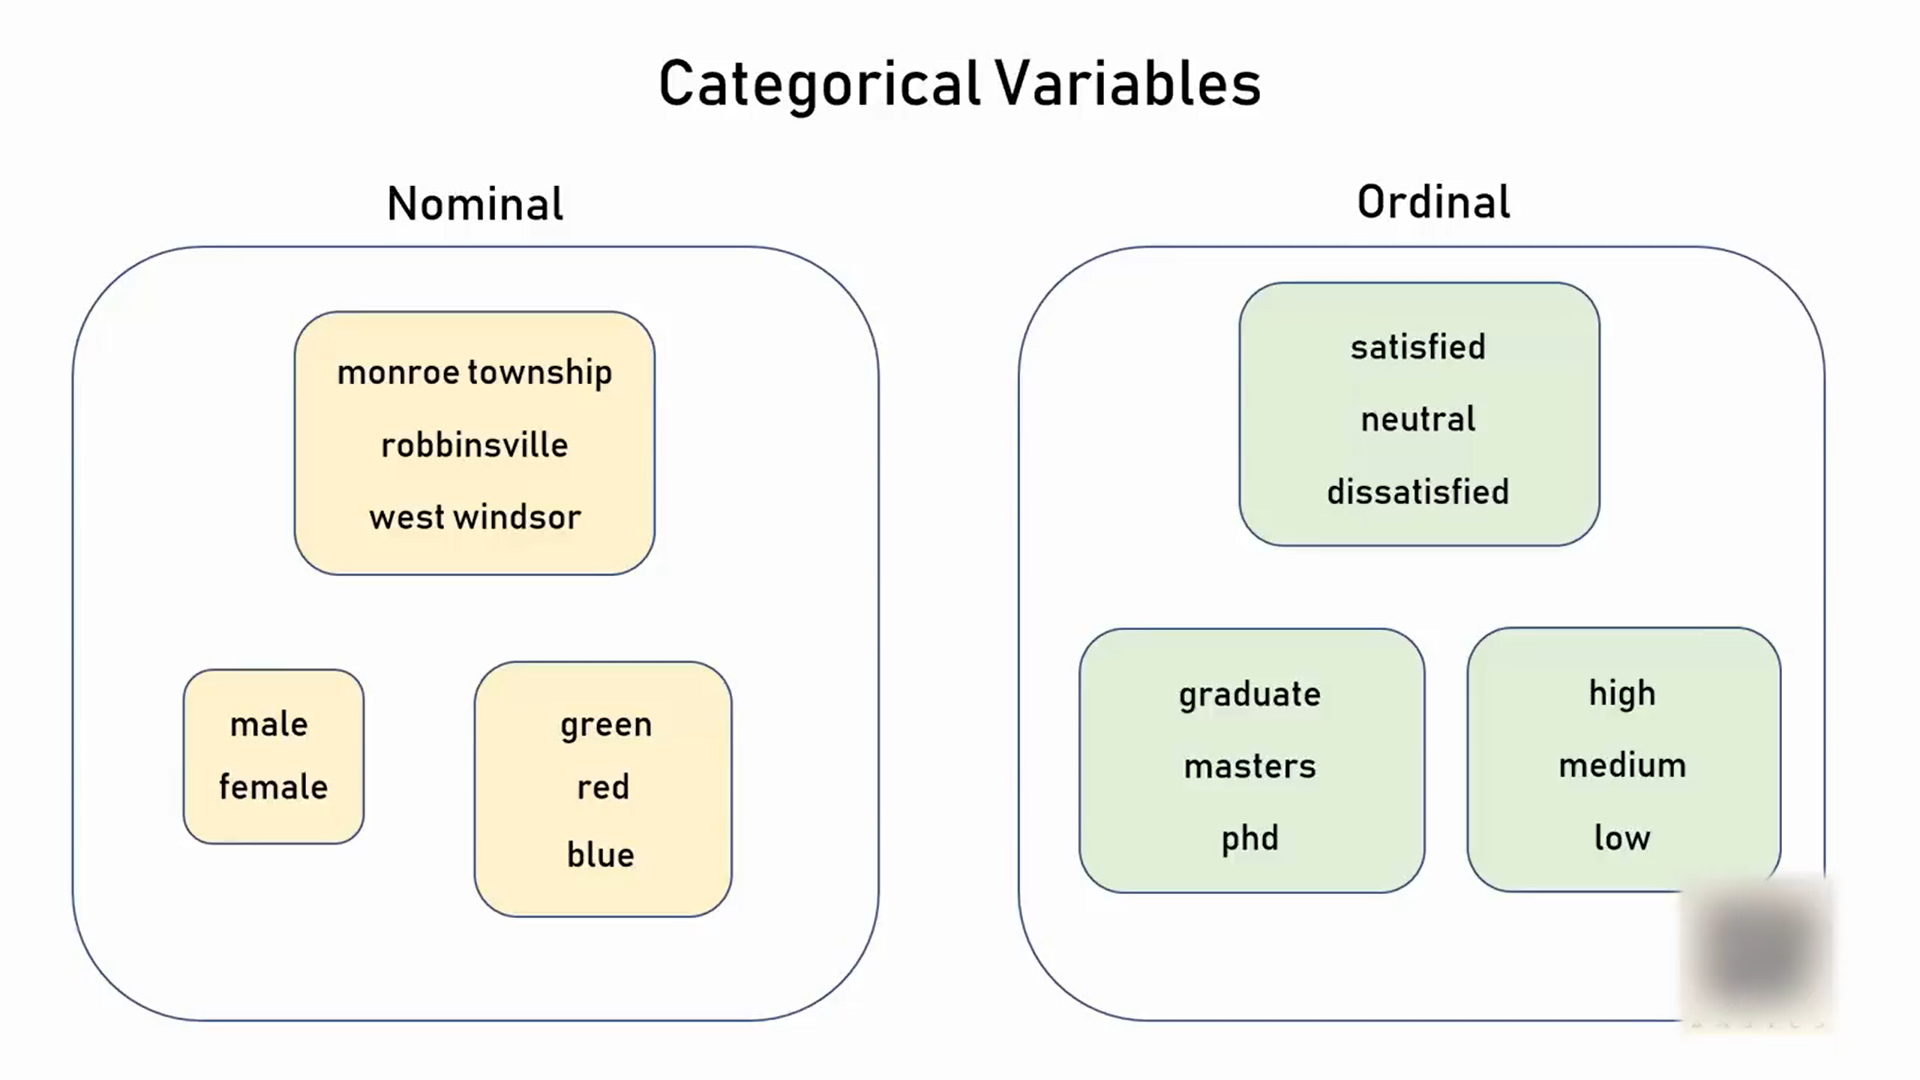

# Using Pandas get_dummies

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Datasets/04_homeprices_town.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [3]:
# create dummy variables
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [4]:
# concatenate actual and dummy dataframes
merged = pd.concat([df,dummies],axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [5]:
# now, we obtain dummy_variables for 'town' so we can remove the 'town' feature
final = merged.drop(['town'], axis='columns')
final

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


# Dummy Variable Trap
Dummy Variable Trap is a scenario in which variables are highly correlated to each other.
The Dummy Variable Trap leads to the problem known as multicollinearity. Multicollinearity occurs where there is a dependency between the independent features. So, in order to overcome the problem of multicollinearity, one of the dummy variables has to be dropped.

__ie.__ our model consists of 3 dummy_variables. we can drop a dummy_variable because using 2 dummy_variables we can represent all the 3 categories.

__eg:__ If we drop west_windsor, we have 2 dummy_variables namely monroe township & robinsville.

now, __[1,0]__ represents - monroe township;    __[0,1]__ represents - robinsville;	__[0,0]__ represents - west windsor

In [6]:
final = final.drop(['west windsor'], axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [7]:
#Training set
X = final.drop('price', axis='columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [8]:
# actual_preice
y = final.price

In [9]:
#training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [10]:
model.predict(X)

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [11]:
# 3400 sqr ft home in west windsor
model.predict([[3400,0,0]]) 

array([681241.66845839])

In [12]:
# 2800 sqr ft home in robbinsville
model.predict([[2800,0,1]])

array([590775.63964739])

# Using sklearn OneHotEncoder

In [13]:
#initially perform Label Encoding
#each label is assigned a unique integer based on alphabetical ordering.
#ie., monroe township - 0, robinsville - 1, west windsor - 2
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
dfle = df                                   #create a new dataframe 'dfle'
dfle.town = le.fit_transform(dfle.town)     #perform LinearEncoding in 'town' column and append it to 'dfle'
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [15]:
le.classes_
#each label is assigned a unique integer based on alphabetical ordering
#ie., monroe township - class 0, robinsville - class 1, west windsor - class 2

array(['monroe township', 'robinsville', 'west windsor'], dtype=object)

In [16]:
X = dfle[['town','area']]
X

,town,area
0,0,2600
1,0,3000
2,0,3200
3,0,3600
4,0,4000
5,2,2600
6,2,2800
7,2,3300
8,2,3600
9,1,2600


In [17]:
y = dfle.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

In [18]:
# Now use one hot encoder to create dummy variables for each of the town
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('ohe', OneHotEncoder(), [0])], remainder = 'passthrough')
# ColumnTransformer is used if we want to perform multiple Scaling one after another. 
# ie., it is used to form a pipeline.
# Syntax: ColumnTransformer([(any_name(optional, Object, Columns)])
# remainder = 'passthrough' means leave the remaining columns as it is.

In [19]:
X = ct.fit_transform(X)
X
# column 0 - monroe township, column 1 - robinsville, column 2 - west windsor
# column 4 - represents area

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [20]:
'''
# OneHotEncoding without using Column Transformer
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
new_X = ohe.fit_transform(X[['town']]).toarray()
# toarray() - bcoz, ohe returns a sparse matrix, so convert it into array
others = X[['area']].values 
# other columns without performing OneHotEncoding
X = np.concatenate((new_X,others),axis=1)
# Concatenate Column wise (axis=1)
X
'''

"\n# OneHotEncoding without using Column Transformer\nfrom sklearn.preprocessing import OneHotEncoder\nohe = OneHotEncoder()\nnew_X = ohe.fit_transform(X[['town']]).toarray()\n# toarray() - bcoz, ohe returns a sparse matrix, so convert it into array\nothers = X[['area']].values \n# other columns without performing OneHotEncoding\nX = np.concatenate((new_X,others),axis=1)\n# Concatenate Column wise (axis=1)\nX\n"

In [21]:
X = X[:,1:]     #Drop the first column (monroe township)
X
#So now, [1,0] represents - robinsville; [0,1] represents - west windsor; [0,0] represents - monroe township

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [22]:
model.fit(X,y)

LinearRegression()

In [23]:
# 3400 sqr ft home in west windsor
model.predict([[0,1,3400]])

array([681241.6684584])

In [24]:
# 2800 sqr ft home in robbinsville
model.predict([[1,0,2800]]) 

array([590775.63964739])